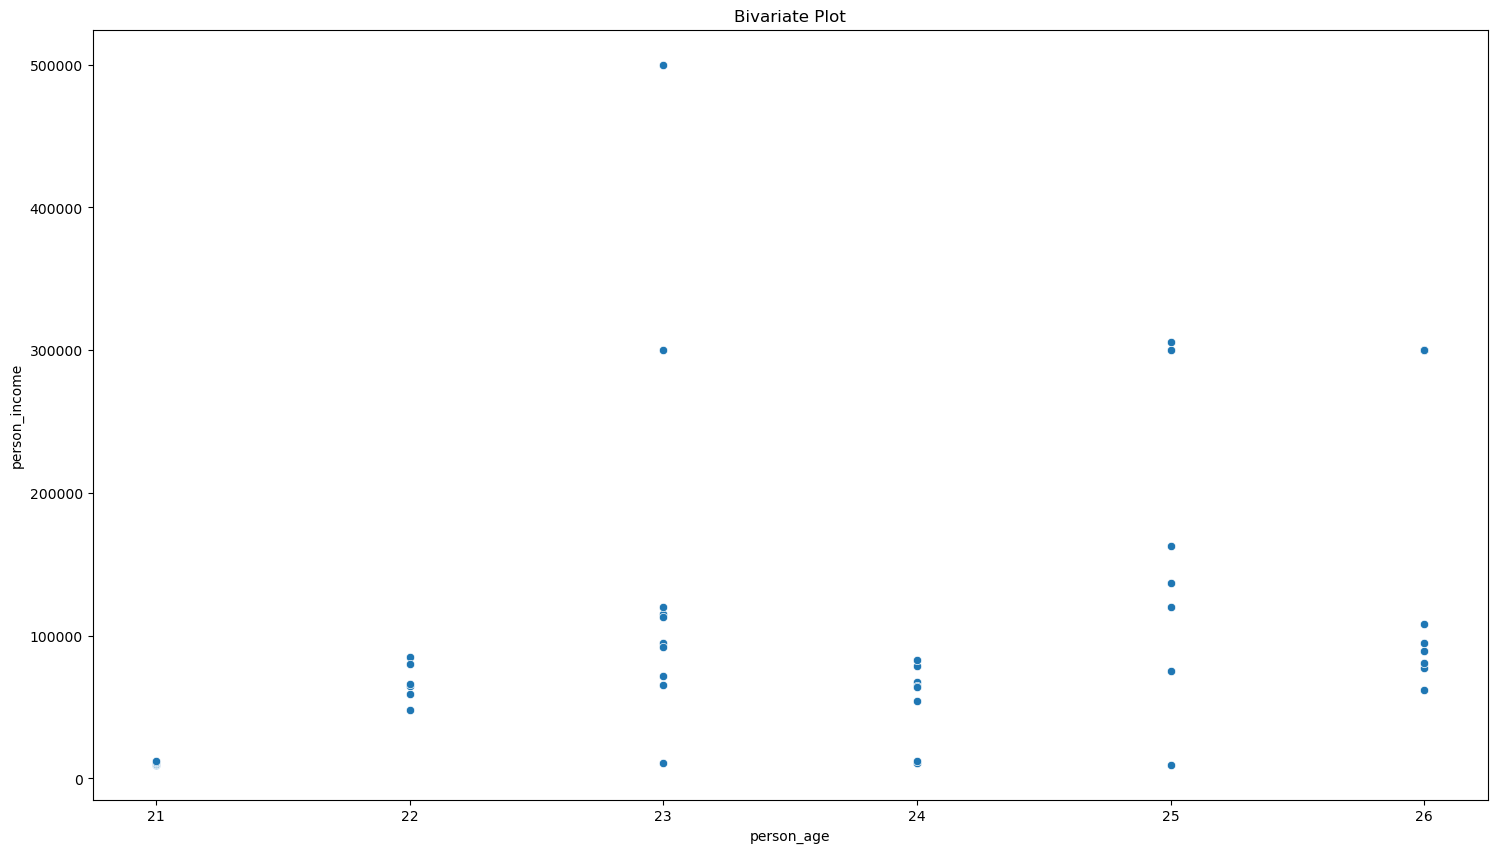

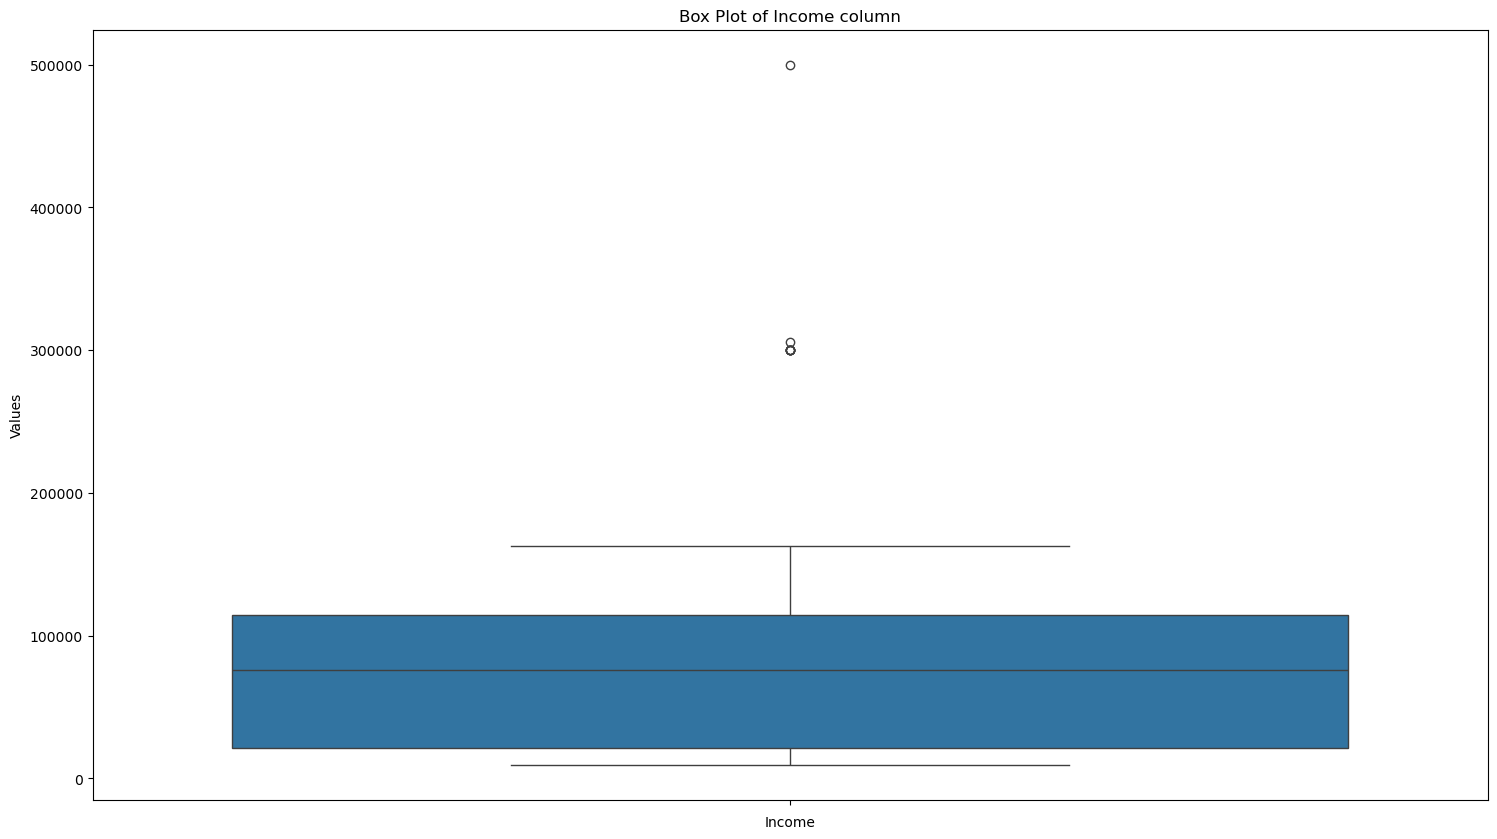

Outliers:
 8


C:\Users\admin\AppData\Local\Temp\ipykernel_6488\4252296040.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '62734.04761904762' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  da.loc[out, 'person_income'] = mean_in


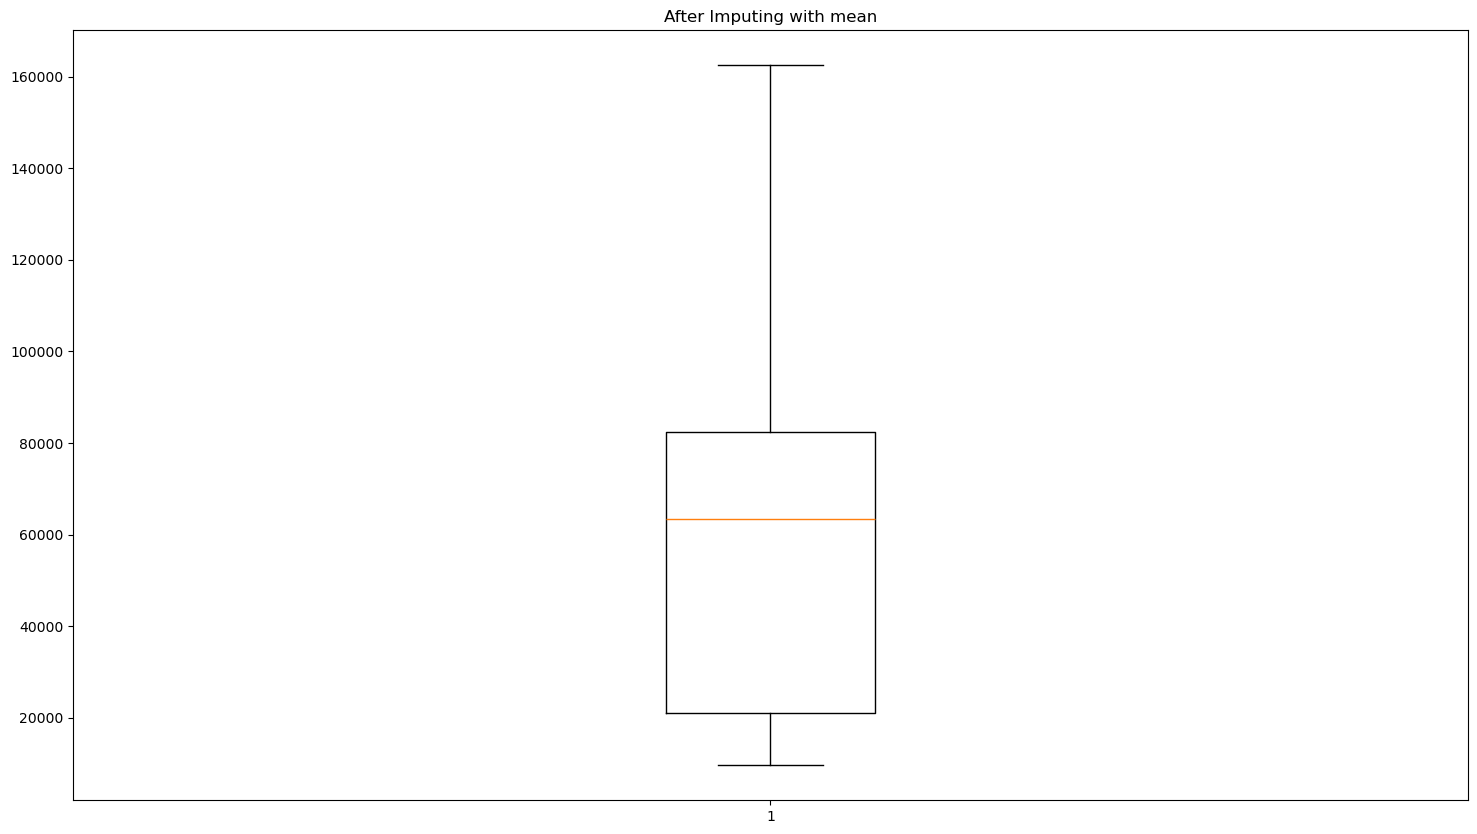

Outliers:
 8


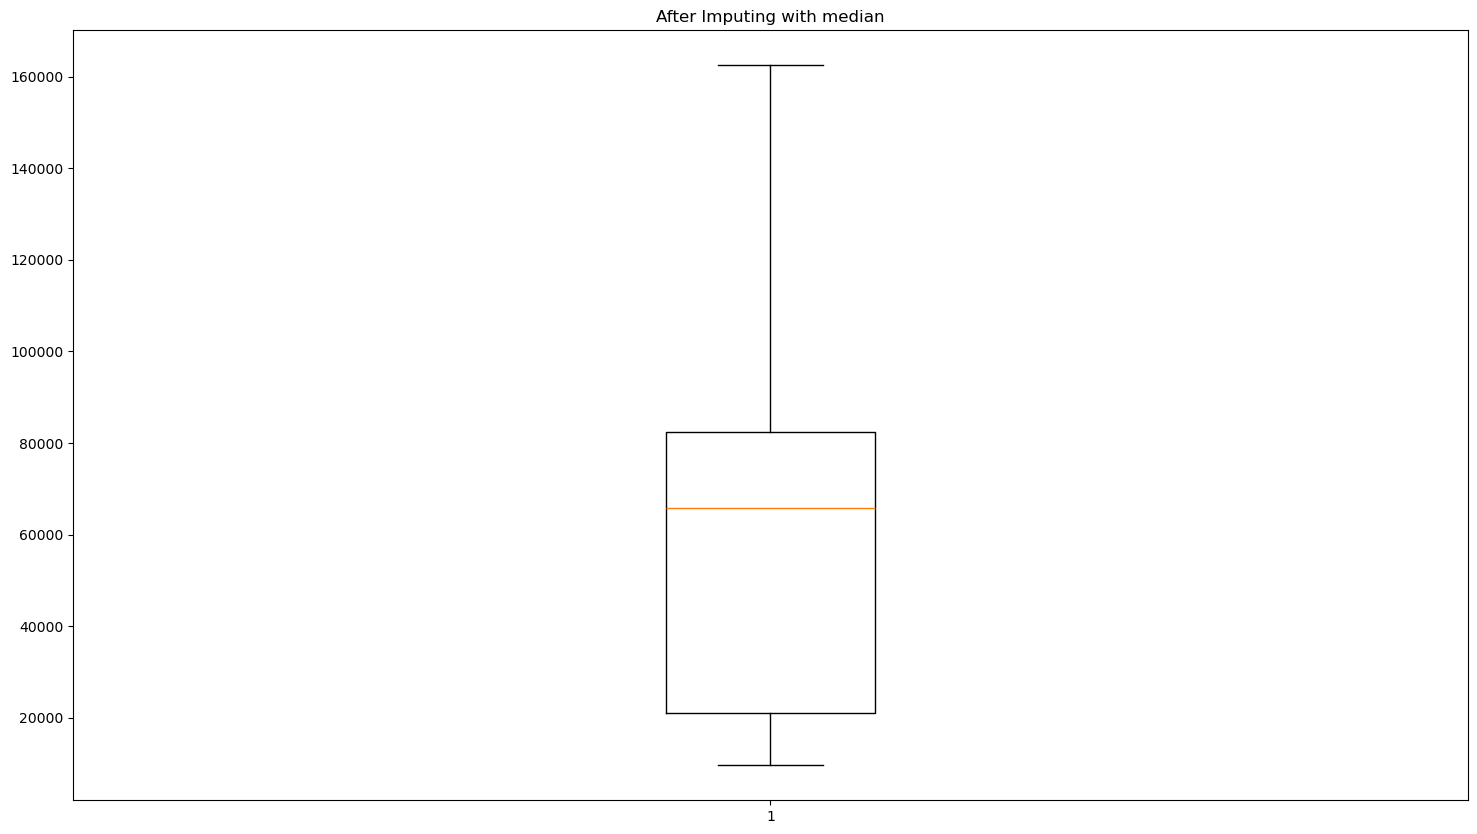

Outliers:
 8


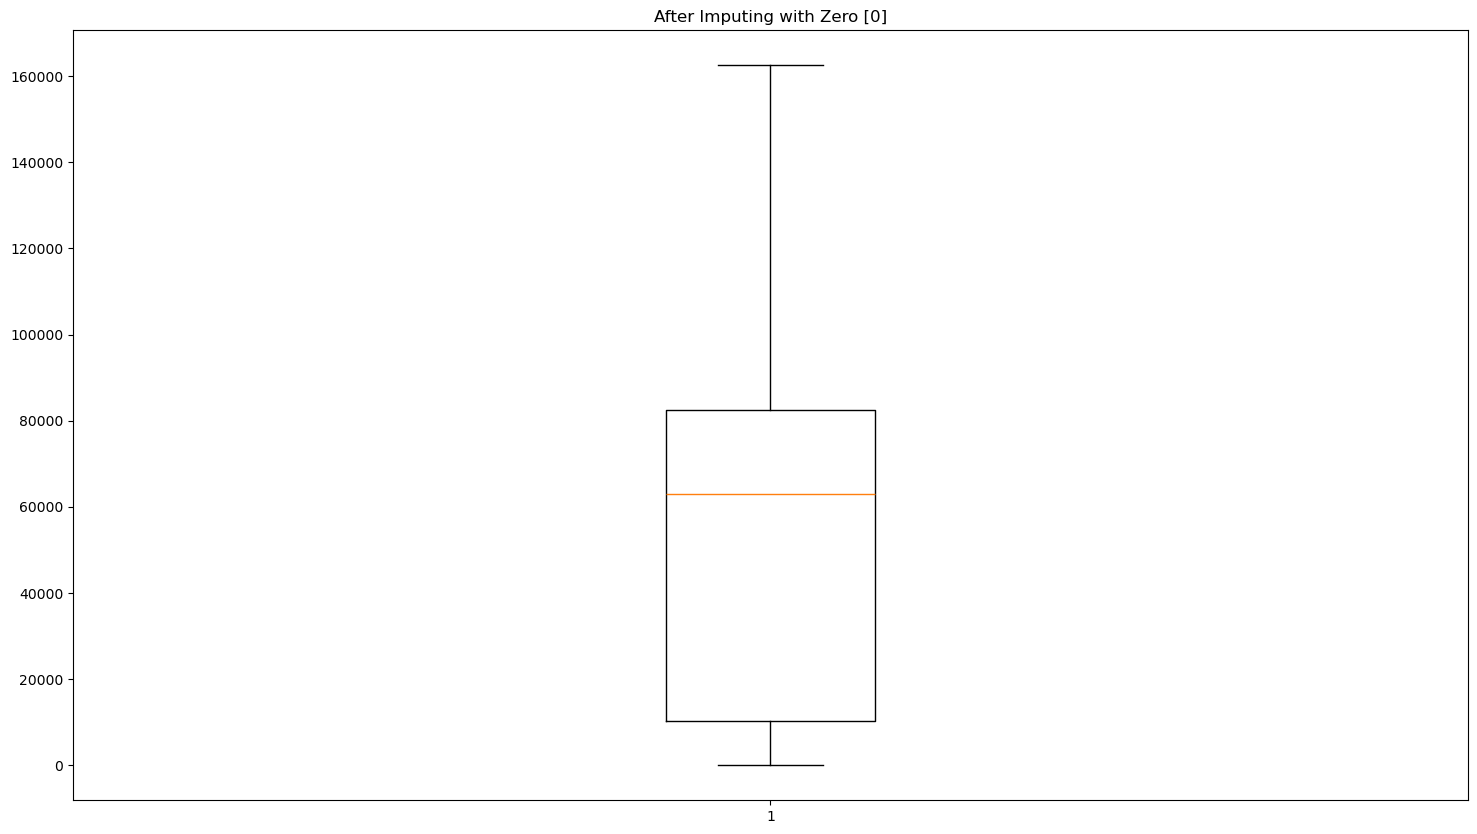

In [11]:

import pandas as p
import matplotlib.pyplot as m
import seaborn as s
da=p.read_csv("credit risk.csv").head(50)
#Bivariate Plot
m.figure(figsize=(18,10))
s.scatterplot(x=da['person_age'],y=da['person_income'],data=da)
m.title("Bivariate Plot")
m.show()
#Box Plot
m.figure(figsize=(18,10))
s.boxplot(da['person_income'])
m.xlabel('Income');m.ylabel('Values')
m.title("Box Plot of Income column")
m.show()

#Detect Outliers using IQR Method
inc=da['person_income']
q1=inc.quantile(0.25)
q3=inc.quantile(0.75)
iqr=q3-q1
low=q1-1.5*iqr
hig=q3+1.5*iqr
out=(inc <= low) | (inc>= hig)
print("Outliers:\n",out.sum())

#Impute Outliers using Mean
mean_in=inc[(inc >= low) & (inc <= hig)].mean()
da.loc[out, 'person_income'] = mean_in
m.figure(figsize=(18,10))
m.boxplot(da['person_income'])
m.title("After Imputing with mean")
m.show()

# #Impute with Median
da=p.read_csv("credit risk.csv").head(50)
inc=da['person_income']
out1= (inc <= low) | (inc >= hig)
print("Outliers:\n",out1.sum())
medi=inc[(inc>= low) & (inc<= hig)].median()
da.loc[out1, 'person_income'] = medi
m.figure(figsize=(18,10))
m.boxplot(da['person_income'])
m.title("After Imputing with median")
m.show()

#Impute with Zero
da=p.read_csv("credit risk.csv").head(50)
inc=da['person_income']
out2=(inc <= low) | (inc>= hig)
print("Outliers:\n",out2.sum())
da.loc[out2, 'person_income'] = 0
m.figure(figsize=(18,10))
m.boxplot(da['person_income'])
m.title("After Imputing with Zero [0]")
m.show()